<a href="https://colab.research.google.com/github/JarnovdKolk/Test/blob/main/Homework2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2, Parts C-E: Neural Network

In this Jupyter notebook, we will train a neural network on the MiniBooNE dataset.

Use this notebook to write your code for problem 1 parts C-E by filling in the sections marked `# TODO` and running all cells.

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam


# Load dataset
data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# =============================
# Problem C: Model with tanh activation and SGD optimizer
# =============================
inputs = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='tanh')(inputs)
x = Dense(128, activation='tanh')(x)
x = Dense(128, activation='tanh')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), verbose=1)

preds_nn = model.predict(X_test)

Epoch 1/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8354 - loss: 0.3797 - val_accuracy: 0.8280 - val_loss: 0.3642
Epoch 2/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8465 - loss: 0.3516 - val_accuracy: 0.8140 - val_loss: 0.3833
Epoch 3/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8423 - loss: 0.3591 - val_accuracy: 0.8050 - val_loss: 0.4180
Epoch 4/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8349 - loss: 0.3734 - val_accuracy: 0.8414 - val_loss: 0.3831
Epoch 5/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8318 - loss: 0.3767 - val_accuracy: 0.8054 - val_loss: 0.4364
Epoch 6/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8182 - loss: 0.4127 - val_accuracy: 0.8102 - val_loss: 0.4940
Epoch 7/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8057 - loss: 0.4596 - val_accuracy: 0.8225 - val_loss: 0.4430
Epoch 8/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8109 - loss: 0.4552 - val_accuracy: 0.

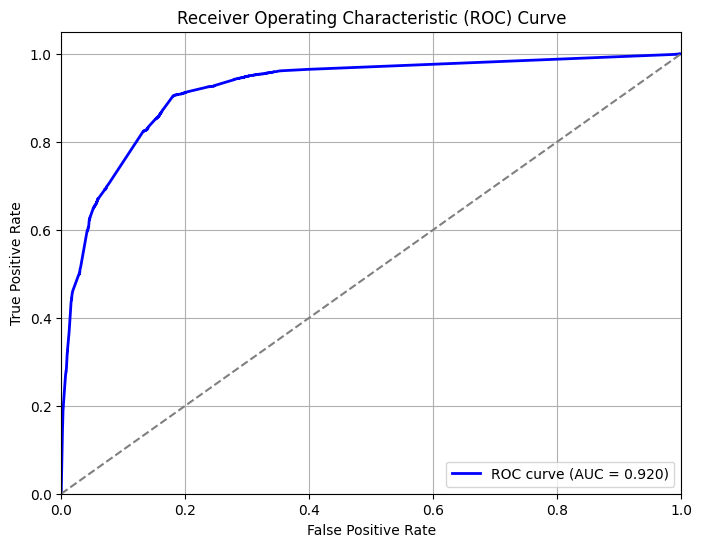

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, preds_nn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Epoch 1/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7063 - loss: nan - val_accuracy: 0.7173 - val_loss: nan
Epoch 2/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7205 - loss: nan - val_accuracy: 0.7173 - val_loss: nan
Epoch 3/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7206 - loss: nan - val_accuracy: 0.7173 - val_loss: nan
Epoch 4/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7172 - loss: nan - val_accuracy: 0.7173 - val_loss: nan
Epoch 5/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7198 - loss: nan - val_accuracy: 0.7173 - val_loss: nan
Epoch 6/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7183 - loss: nan - val_accuracy: 0.7173 - val_loss: nan
Epoch 7/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7160 - loss: nan - val_accuracy: 0.7173 - val_loss: nan
Epoch 8/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7217 - loss: nan - val_accuracy: 0.7173 - val_loss: nan
Epoch 9/50
813/813 ━━━━━

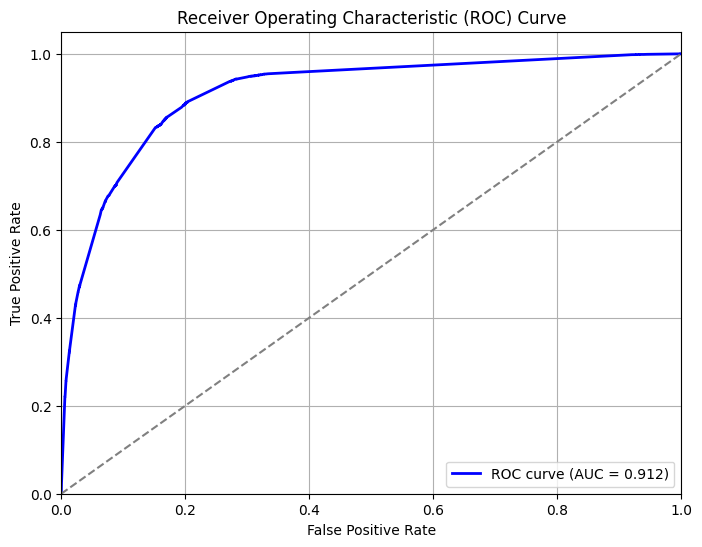

In [5]:
# =============================
# Problem D: Model with ReLU activation and SGD optimizer
# =============================
inputs = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), verbose=1)

preds_nn = model.predict(X_test)
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, preds_nn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

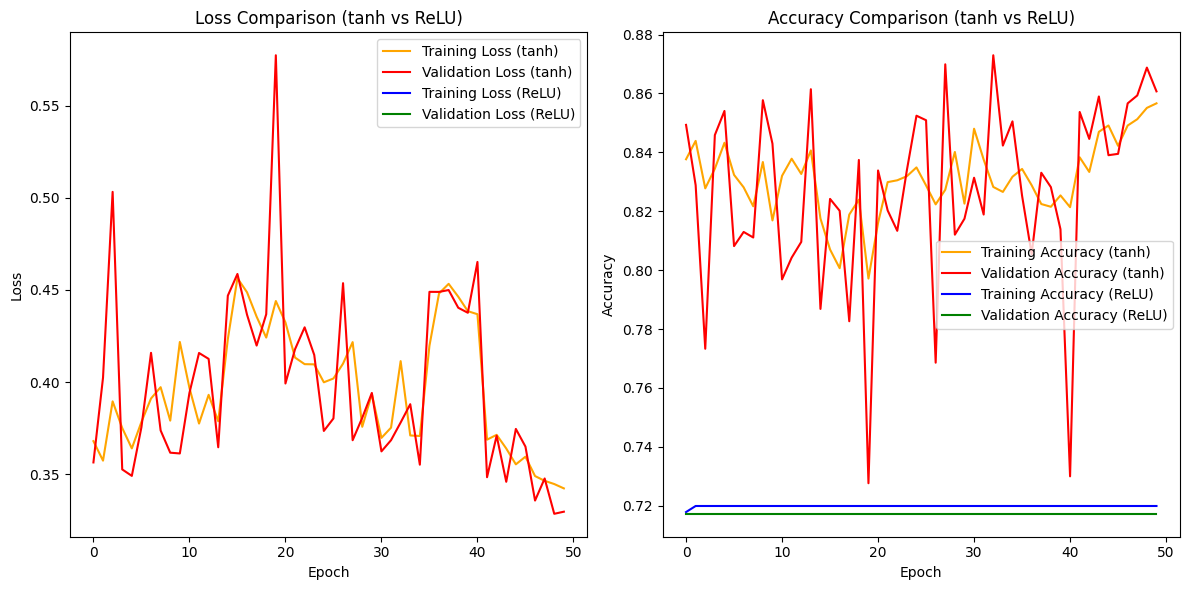

In [9]:
# Create and train the model with tanh activation
inputs_tanh = Input(shape=(X_train.shape[1],))
x_tanh = Dense(128, activation='tanh')(inputs_tanh)
x_tanh = Dense(128, activation='tanh')(x_tanh)
x_tanh = Dense(128, activation='tanh')(x_tanh)
outputs_tanh = Dense(1, activation='sigmoid')(x_tanh)
model_tanh = Model(inputs=inputs_tanh, outputs=outputs_tanh)

model_tanh.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

history_tanh = model_tanh.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), verbose=0)

# Create and train the model with ReLU activation
inputs_relu = Input(shape=(X_train.shape[1],))
x_relu = Dense(128, activation='relu')(inputs_relu)
x_relu = Dense(128, activation='relu')(x_relu)
x_relu = Dense(128, activation='relu')(x_relu)
outputs_relu = Dense(1, activation='sigmoid')(x_relu)
model_relu = Model(inputs=inputs_relu, outputs=outputs_relu)

model_relu.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

history_relu = model_relu.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), verbose=0)

# Plotting the loss and accuracy curves for both models
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_tanh.history['loss'], label='Training Loss (tanh)', color='orange')
plt.plot(history_tanh.history['val_loss'], label='Validation Loss (tanh)', color='red')
plt.plot(history_relu.history['loss'], label='Training Loss (ReLU)', color='blue')
plt.plot(history_relu.history['val_loss'], label='Validation Loss (ReLU)', color='green')
plt.title('Loss Comparison (tanh vs ReLU)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_tanh.history['accuracy'], label='Training Accuracy (tanh)', color='orange')
plt.plot(history_tanh.history['val_accuracy'], label='Validation Accuracy (tanh)', color='red')
plt.plot(history_relu.history['accuracy'], label='Training Accuracy (ReLU)', color='blue')
plt.plot(history_relu.history['val_accuracy'], label='Validation Accuracy (ReLU)', color='green')
plt.title('Accuracy Comparison (tanh vs ReLU)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


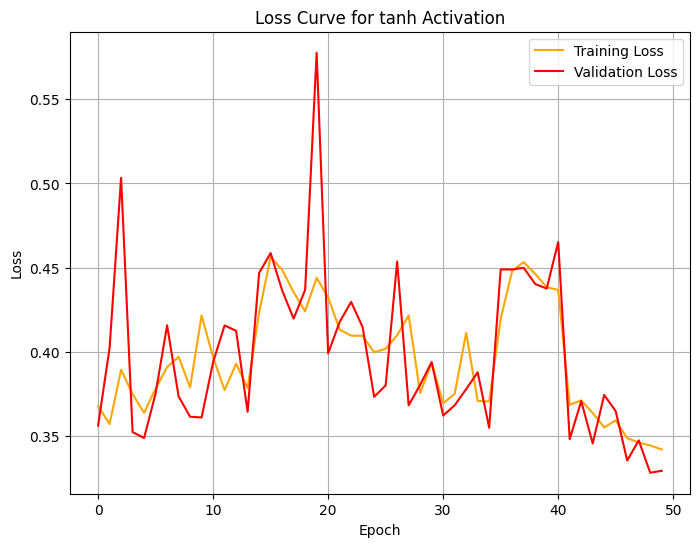

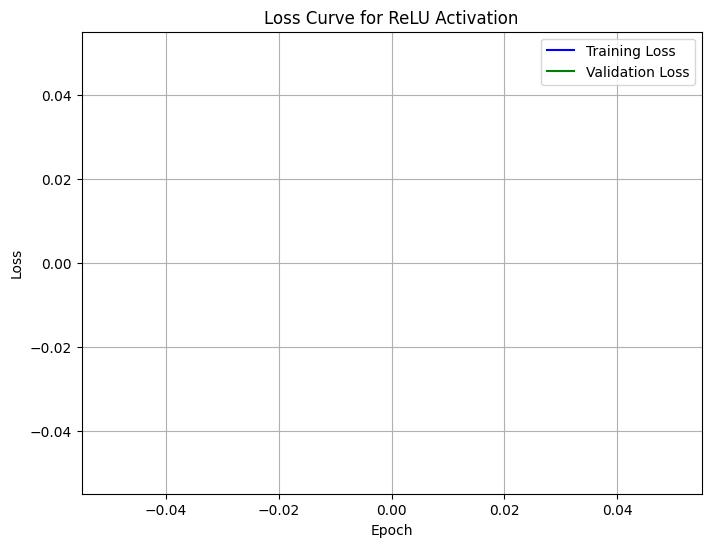

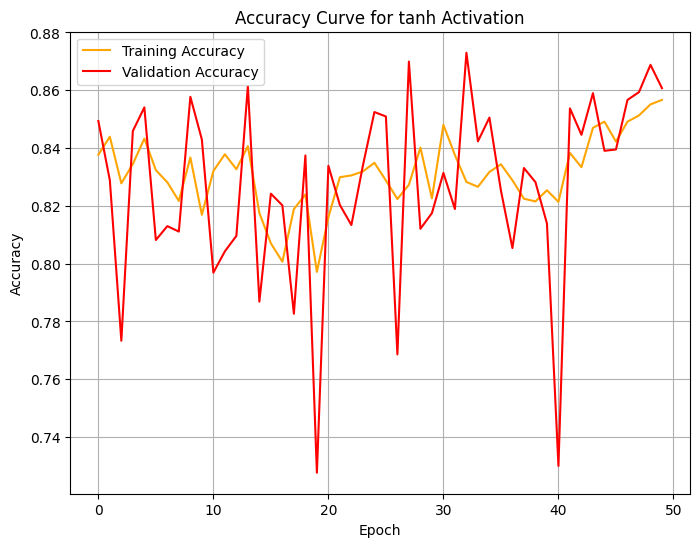

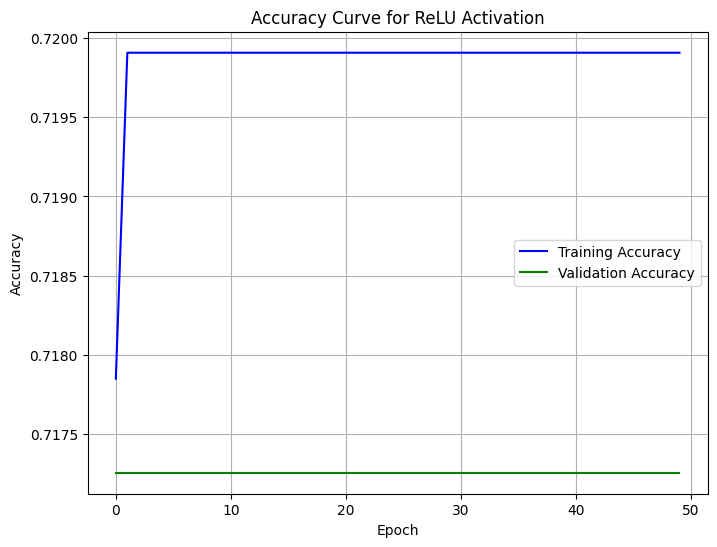

In [11]:
import matplotlib.pyplot as plt

# Plot Loss for tanh
plt.figure(figsize=(8, 6))
plt.plot(history_tanh.history['loss'], label='Training Loss', color='orange')
plt.plot(history_tanh.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss Curve for tanh Activation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Loss for ReLU
plt.figure(figsize=(8, 6))
plt.plot(history_relu.history['loss'], label='Training Loss', color='blue')
plt.plot(history_relu.history['val_loss'], label='Validation Loss', color='green')
plt.title('Loss Curve for ReLU Activation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy for tanh
plt.figure(figsize=(8, 6))
plt.plot(history_tanh.history['accuracy'], label='Training Accuracy', color='orange')
plt.plot(history_tanh.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Curve for tanh Activation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy for ReLU
plt.figure(figsize=(8, 6))
plt.plot(history_relu.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_relu.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Accuracy Curve for ReLU Activation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


Epoch 1/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8722 - loss: 0.3043 - val_accuracy: 0.9036 - val_loss: 0.2273
Epoch 2/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9071 - loss: 0.2227 - val_accuracy: 0.9099 - val_loss: 0.2126
Epoch 3/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9145 - loss: 0.2034 - val_accuracy: 0.9173 - val_loss: 0.1990
Epoch 4/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9205 - loss: 0.1921 - val_accuracy: 0.9210 - val_loss: 0.1896
Epoch 5/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9222 - loss: 0.1893 - val_accuracy: 0.9214 - val_loss: 0.1898
Epoch 6/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9280 - loss: 0.1776 - val_accuracy: 0.9275 - val_loss: 0.1774
Epoch 7/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9291 - loss: 0.1733 - val_accuracy: 0.9268 - val_loss: 0.1775
Epoch 8/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9296 - loss: 0.1717 - val_accuracy: 0.

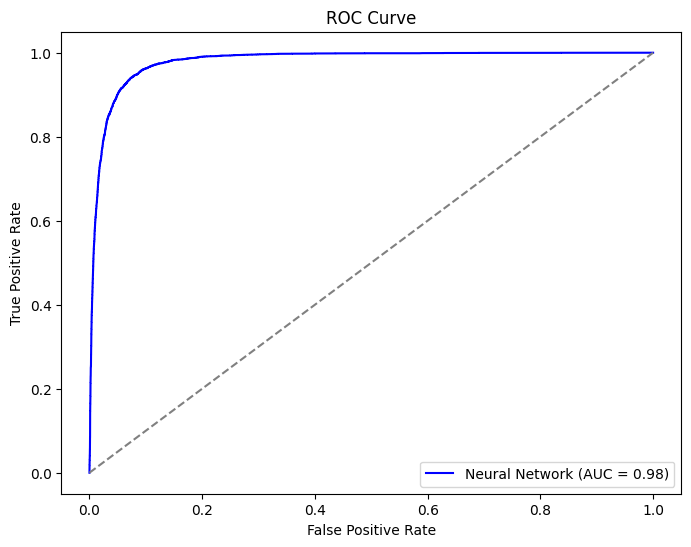

In [12]:
# =============================
# Problem E: Standardized features & Adam optimizer
# =============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

inputs = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, validation_data=(X_test_scaled, y_test), verbose=1)

# Predict and plot ROC
preds_nn = model.predict(X_test_scaled)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
preds_nn = model.predict(X_test_scaled)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, preds_nn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'Neural Network (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [13]:
_, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Neural Network Test Accuracy: {accuracy:.4f}')

Neural Network Test Accuracy: 0.9346
